# Introduction
This assignment using dataset from Kaggle (Telco-Customer-Churn) and Jupyter Notebook app. 

Here are some information about dataset based on the website : 
- Customer selected service : `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`
- Customer account information : `tenure`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges` 
- Customer demographic : `gender`, `SeniorCitizen`, `Partner`, `Dependents`
- Customer churn : `Churn`

In [1]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Standard Data Cleansing

In [2]:
# Import & preview data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Filtering the data

# exclude rows that contain whitespace from TotalCharges columns
df = df.loc[~df['TotalCharges'].str.contains(' ')]

# transform the dtype of TotalCharges columns
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [4]:
# Sampling data
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1959,5882-CMAZQ,Female,0,Yes,Yes,5,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,34.25,163.55,No
4827,9560-ARGQJ,Female,0,No,Yes,16,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,81.00,1312.15,Yes
5284,3317-HRTNN,Female,1,No,No,5,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,45.70,198.00,Yes
6156,0118-JPNOY,Female,1,No,No,26,Yes,No,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.80,2193.65,No
6472,1150-FTQGN,Female,0,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,One year,No,Bank transfer (automatic),94.15,5811.80,No


In [5]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Observation :
1. The dataset : 21 columns, 7042 rows.
2. The entries changed to 7032 after filtering step.
3. The dataset contains customer information from telecommunications companies that provide various services such as streaming, telephone, and internet.

## Missing values

In [6]:
# Missing values percentage
df.isna().sum() * 100 / len(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

There are no missing values in the data

## Duplicated values

In [7]:
# Duplicated values checking
df.duplicated().sum()

0

There are no duplicated data in the data.

# 2. Standard EDA

## Statistical summary 

In [8]:
# Grouping the columns

# Numerical columns
numericals = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Categorical columns
categoricals = list(df.columns)
categoricals.remove('tenure')
categoricals.remove('MonthlyCharges')
categoricals.remove('TotalCharges')
categoricals.remove('customerID') # contain to much unique values

In [9]:
# Statistics description of numerical column 
df[numericals].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Observation : 
1. The data is make sense, based on min and max value in every columns.
2. The `tenure` value describe the total month service used. `MonthlyCharges` and `TotalCharges` value describe the customer charge values.
3. All columns have skewed distribution
    - `tenure` with positive skew, mean > median
    - `MonthlyCharges` with negative skew, mean < median
    - `TotalCharges` with positive skew, mean > median
    
    It will be validated in the next step

In [11]:
# Converting value in seniorcitizen columns

df['SeniorCitizen'] = df['SeniorCitizen'].replace(0, 'No').replace(1, 'Yes')

In [12]:
# Statistics description of categorical columns
for col in categoricals:
    print(f"Description of {col} column")
    print(df[col].describe(), '\n')

Description of gender column
count     7032
unique       2
top       Male
freq      3549
Name: gender, dtype: object 

Description of SeniorCitizen column
count     7032
unique       2
top         No
freq      5890
Name: SeniorCitizen, dtype: object 

Description of Partner column
count     7032
unique       2
top         No
freq      3639
Name: Partner, dtype: object 

Description of Dependents column
count     7032
unique       2
top         No
freq      4933
Name: Dependents, dtype: object 

Description of PhoneService column
count     7032
unique       2
top        Yes
freq      6352
Name: PhoneService, dtype: object 

Description of MultipleLines column
count     7032
unique       3
top         No
freq      3385
Name: MultipleLines, dtype: object 

Description of InternetService column
count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object 

Description of OnlineSecurity column
count     7032
unique       3
top 

In [13]:
# Data distribution in categorical columns
for col in categoricals:
    print(f"Value counts of {col} column")
    print(df[col].value_counts(), '\n')

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of SeniorCitizen column
No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

Value counts of OnlineBackup column
No                     3087
Yes                    2425
No inte

### Observation :
1. Customer demographic :
 - `gender` seems balance
 - `SeniorCitizen` dominated with non-senior citizen
 - `Partner` dominated with no-partner customer
 - `Dependents` dominated with no-dependent customer
2. Customer selected service :
 - `PhoneService` became a requirement for `MultipleLines`, and most of cust have this service.
 - `InternetService` divided into `Fiber optic` and `DSL`, dominated by `Fiber optic` user.
 - Without `InternetService` the cust can't get another services, such as `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies`.
3. Customer account information : 
 - `Contract` that most taken consecutively : `Month-to-month`, `Two year`, and `One year`.
 - `PaperlessBilling` is most favourite customer choice.
 - `Churn` choice is dominated by customers that continue the service, `churn=No`. 

In [14]:
# Lowercase all columns
df.columns = df.columns.str.lower()

# Re-grouping the columns
numericals = ['tenure', 'monthlycharges', 'totalcharges']
categoricals = list(df.columns)
categoricals.remove('tenure')
categoricals.remove('monthlycharges')
categoricals.remove('totalcharges')
categoricals.remove('customerid') #contain to much unique values

## Univariate analysis

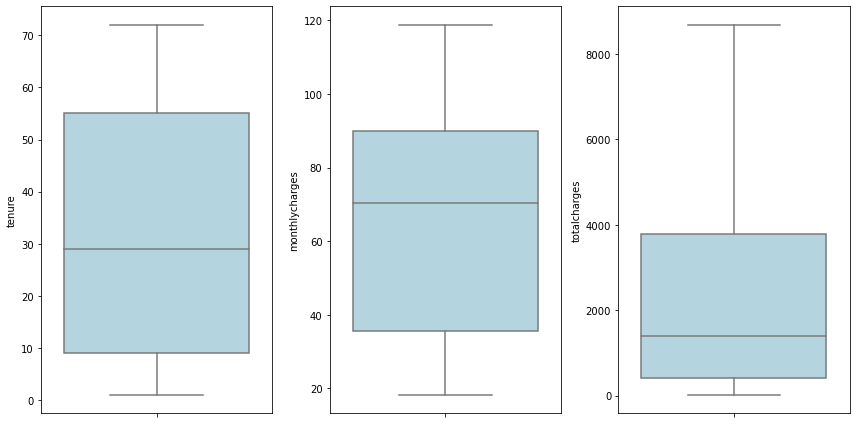

In [15]:
# Detecting outliers via boxplot

# Setup figure
plt.figure(figsize=(12,6))

# Plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightblue')
    plt.tight_layout()

### Observation : 
1. No outliers in all column, no need to drop.
2. `tenure` smallest value = 1, represent the new customer.
3. `totalcharges` smallest value = 18.8, represent the new customer service data.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

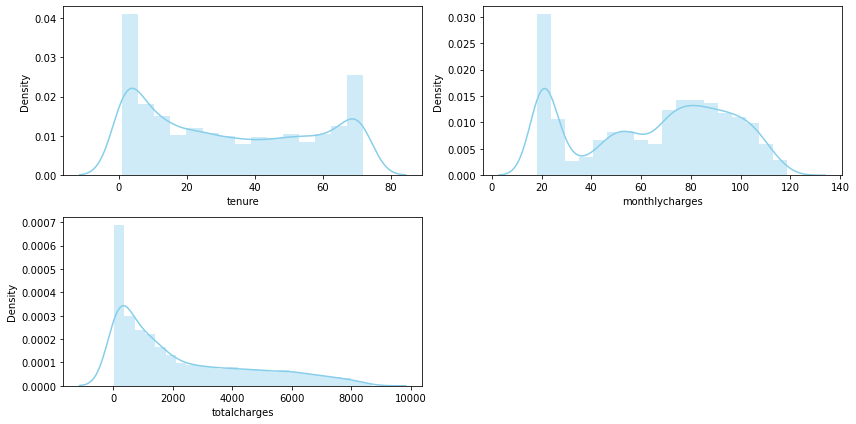

In [16]:
# Validating the distribution form using KDE plot 

# Setup figure
plt.figure(figsize=(12,6))

# Plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation :
1. Most of the customer has :
 - `tenure` = 1 month
 - `monthlycharges` and ` totalcharges` ~20 dollar
2. `tenure` and `totalcharges` column are validated has a positive skew.

## Bivariate analysis

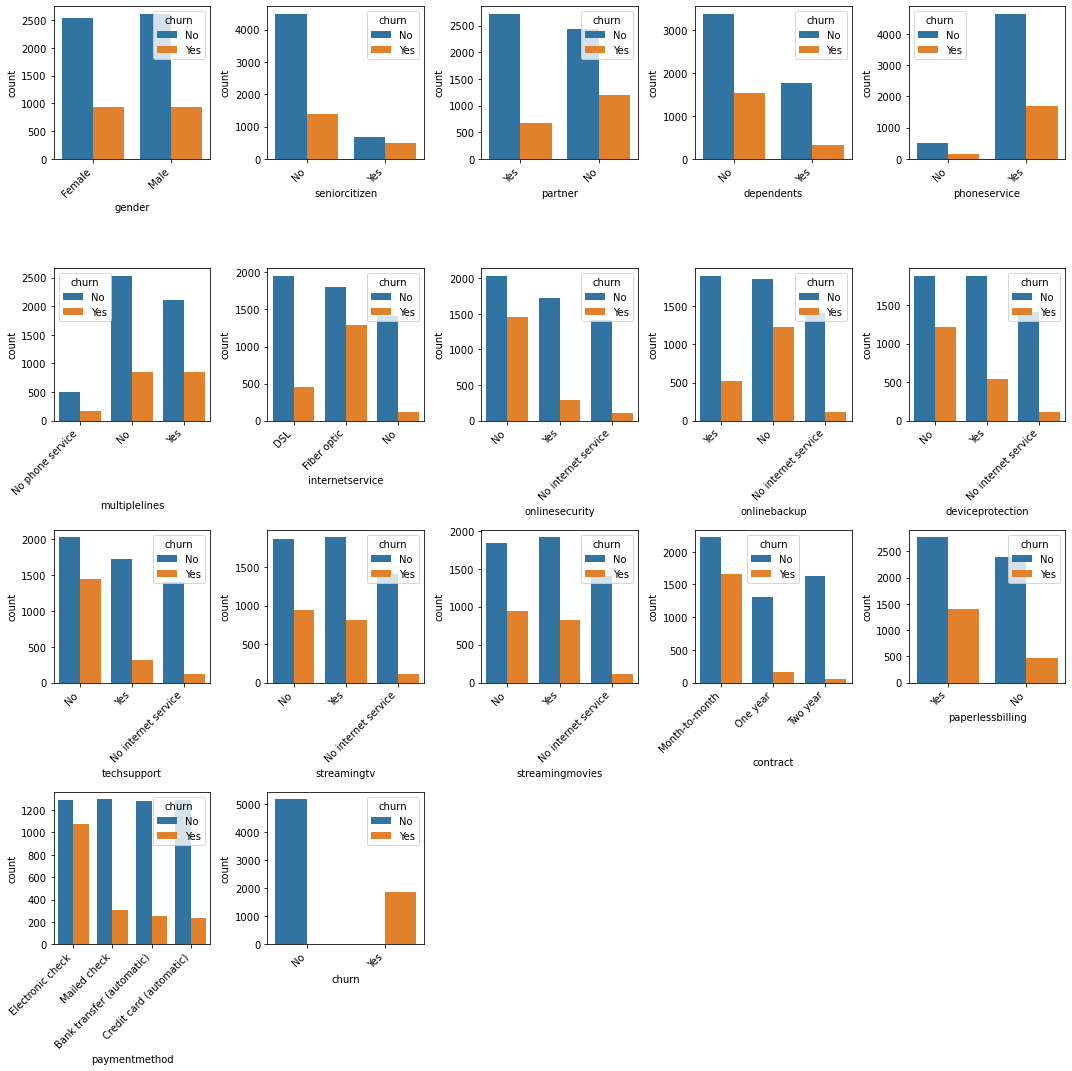

In [22]:
# Visualization of unique value of each categorical column based on churn rate

# Setup figure
cols = 5
rows = 4
fig = plt.figure(figsize= (15,15))

# Plotting
all_categorics = df.select_dtypes(include='object')
categoric_columns = all_categorics.columns[all_categorics.nunique()<5]
for i, col in enumerate(categoric_columns):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=df[col], hue='churn', data=df, ax=ax)    
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()  
plt.show()

### Observation :
- `gender` doesnt seem affect `churn` rate.
- `seniorcitizen`, dominated by the senior that LEAVE the service.
- `partner`, customer without partner tend to LEAVE the service.
- `dependents`, customer without dependents tend to LEAVE the service.
- `phoneservice` doesnt seem affect the `churn` rate.
- `multiplelines`, customer with `No phone service` tend to RETAIN the service.
- `internetservice`, customer that choose `Fiber optic` tend to LEAVE the service.
- `churn` rate HIGHER in customer that has NO `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, and `streamingmovies` service.
- `contract`, customer with `Month-to-Month` tend to LEAVE the service.
- `paperlessbilling` has HIGHER churn rate.
- `paymentmethod` with `Electronic check` have the HIGHEST churn rate compared to another method.

## Multivariate analysis

<AxesSubplot:>

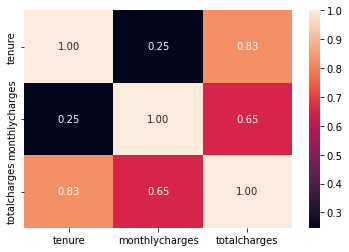

In [23]:
# Correlation heatmap
correlation = df[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation :
- `tenure` and `totalcharges` have a strong correlation with each other (>0.8).
- Strong correlation indicates redundant value.
- There will be drop feature for choosing the one for model in ML.

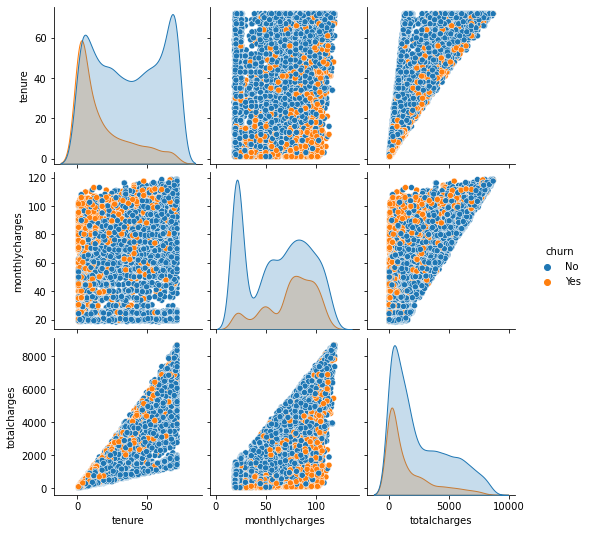

In [24]:
# Pairplot data
sns.pairplot(df, vars=numericals, hue='churn')

Observation :
- `churn` is considered HIGH for customers in low `tenure` and low `totalcharges` characters.
- The higher monthly charges, the higher churn. But at a certain point (`monthlycharges>100`), `churn` rate decreased.

## Standard EDA resume
- The dataset has no major issues. The *whitespace* removed by filtering.
- Overall the min and max value in every column are make sense.
- The numerical columns distribution are skewed.
- Retain customer (`churn = 0`) more HIGHER than churned customer (`churn = 1`).
- There is no outlier in dataset.
- Customer tend to leave/`churn` after first month service.
- Some of feature that have a HIGH `churn` rate : `seniorcitizen = 1`, `Month-to-Month contract`, `Electronic check paymentmethod`, and `Fiber optic internetservice`.
- `tenure` and `totalcharges` have high correlation value based on the heatmap. 
- LOW `tenure` and LOW `totalcharges` customer tend to LEAVE the service. 

# 3. Deep-Dive Exploration

Some of question based on Standard EDA Resume before :
1. How is the customer `tenure` distribution based on the `contract` type?
2. Top 3 churned `paymentmethod` based on total `monthlycharges` customer.

***1. How is the customer `tenure` distribution based on the `contract` type?***

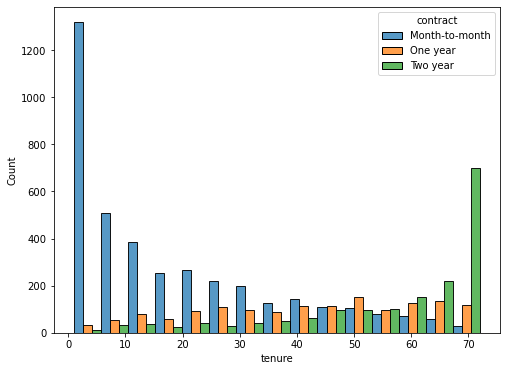

In [25]:
# Data
data_1_viz = df[['tenure', 'contract']]

# Visualisasi
plt.subplots(figsize=(8, 6))
sns.histplot(data=data_1_viz, x='tenure', hue='contract', multiple='dodge')
plt.show()

Customer with `Month-to-Month` contract type is tend to have short `tenure` (< 5 month). So it can be assume that :
1. New customer tend to choose the shortest contract.
2. Customer tend to pick the `Month-to-Month` contract.

Evaluation :
1. Service satisfaction survey to make the service performance mapping.
2. Discount service upgrades, to increase customer interest in extending the contract.

***2. Top 3 churned `paymentmethod` based on total `monthlycharges` customer***

In [26]:
# Groupby data 
data_2 = (df.groupby(['paymentmethod', 'churn'])
          .agg(total=('monthlycharges', 'sum'))
          .reset_index()
         )

# Filtering 
data_2 = (data_2[data_2['churn'].isin(['Yes'])]
          .sort_values('total', ascending=False)
          .reset_index()
         )
data_2

,index,paymentmethod,churn,total
0,5,Electronic check,Yes,84288.75
1,1,Bank transfer (automatic),Yes,20091.90
2,3,Credit card (automatic),Yes,17946.60
3,7,Mailed check,Yes,16803.60


In [27]:
# List top 3
top_3 = ['Electronic check', 'Bank transfer (automatic)', 'Credit card (automatic)']

# Filtering
data_2 = data_2[data_2['paymentmethod'].isin(top_3)]

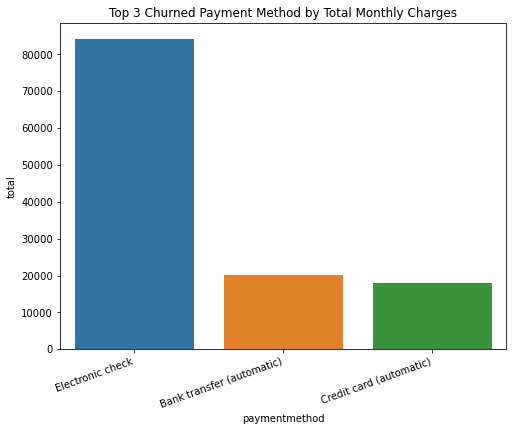

In [29]:
# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=data_2, x='paymentmethod', y='total')
plt.title(label='Top 3 Churned Payment Method by Total Monthly Charges')
plt.xticks(rotation=20, ha='right')
plt.show()


`Electronic check` is relatively high, and it is a favorite of customers who have a tendency to `churn` compared to other payment methods. The high nominal in total `monthlycharges` lead the assumptions to :
1. The payment is practical and fast, making it easier for customers.
2. Too many `churn` customers so the nominal is high.

The evaluation that can be applied is routine maintenance in the payment line, due to the high interest of customers in the `payment method`.